<a href="https://colab.research.google.com/github/hprabowo076/Customer-Classification/blob/main/Telemarketing%20Effectiveness%20on%20Converting%20Bank's%20Client%20into%20a%20Term%20Deposit%20Subscriber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telemarketing Effectiveness on Converting Bank's Client into a Term Deposit Subscriber**

# Introduction

This is a dataset related to the direct marketing campaigns of a Portuguese banking institution. Source: https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets

Telephonic marketing (telemarketing) campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

The classification goal is to predict if the client will subscribe to a term deposit.

In this notebook, the objective is to:
- Classify which type of customers that will subscribe to the bank's term deposit because of the telemarketing. 
- Knowing what factors for a telemarketing campaign to be successful
- Building classification model to predict whether a client will subscribe to a term deposit when contacted by telephone 

Hopefully, the results from our investigation can produce useful insights in knowing the effectiveness of telemarketing on converting customers.

**Name**: Haryo Prabowo

# Import

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  learning_curve
from sklearn.metrics import precision_recall_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
from sklearn.model_selection import GridSearchCV

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Bootcamp/Project/Final Project/train.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Features description

bank client data:



1. age (numeric)
2. job : type of job
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")

# Pre-processing

## Changing target variable column name to 'subscribed'

In [ ]:
df = df.rename(columns={'y':'subscribed'})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Check missing and duplicated values

In [ ]:
# check missing values
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
# check duplication 
df.duplicated().sum()

0

Observation:

*   There are no null and duplicated values



In [ ]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Observation:
* All numericals values are reasonable with no obvious outlier
* Large majority of `previous` and `pdays` columns are not unique, with 0 and -1 respectively, indicating that almost all clients are not previously contacted, so it can be safely be ignored for the analysis


## Check for string values

In [ ]:
stringdata = df.select_dtypes(include="object")
for column in stringdata:
    print(stringdata[column].value_counts())
    print ("-" * 20)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------
no     44396
yes      815
Name: default, dtype: int64
--------------------
yes    25130
no     20081
Name: housing, dtype: int64
--------------------
no     37967
yes     7244
Name: loan, dtype: int64
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
--------------------
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar

Observation:
*   Columns `job`, `education`, `contact` and `poutcome` have 'unknown' values, which have to be filled:
  *   Job column: Ignore the 288 rows with unknown job because there are no reasonable values to be replaced ("blue collar" and "management" frequencies are only about 25%), and this is a small amount of data compared to our dataset size
  *   Poutcome column: Ignore this column since most of data are unknown (36,959 out of 45,211)
  *   Education and Contact columns: Will be filled with the most frequent values







In [ ]:
df = df[df['job'] != 'unknown']

df.drop('poutcome', axis = 1, inplace = True)

df['education'].replace("unknown", df['education'].mode()[0], inplace = True)
df['contact'].replace("unknown", df['contact'].mode()[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
stringdata = df.select_dtypes(include="object")
for column in stringdata:
    print(stringdata[column].value_counts())
    print ("-" * 20)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
--------------------
married     27011
single      12722
divorced     5190
Name: marital, dtype: int64
--------------------
secondary    24861
tertiary     13262
primary       6800
Name: education, dtype: int64
--------------------
no     44110
yes      813
Name: default, dtype: int64
--------------------
yes    25104
no     19819
Name: housing, dtype: int64
--------------------
no     37683
yes     7240
Name: loan, dtype: int64
--------------------
cellular     42063
telephone     2860
Name: contact, dtype: int64
--------------------
may    13735
jul     6864
aug     6184
jun     5251
nov     3956
apr     2925
feb     2636
jan     1388
oct      727
sep      570
mar      474
dec      213
Name: month, dtype: int64
-----------

The data is now ready to be used for further processing

# Finalizing the dataset

## Copy datasets for EDA and modelling purposes

In [ ]:
main = df.copy()
main

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


## Converting binary column and One Hot Encoding

In [ ]:
eda = pd.get_dummies(df,drop_first=True,columns=['subscribed','default','housing','loan','contact'])
main = main.drop(["month","day","pdays","previous"], axis=1)
main = pd.get_dummies(main,drop_first=True)
main.head()

,age,balance,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,subscribed_yes
0,58,2143,261,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1,44,29,151,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
2,33,2,76,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
3,47,1506,92,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
5,35,231,139,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0


*   All categorical data are already converted to binary and one hot encoding.
*   Dropping unneccesary feature because we will not be looking at specific timeframe
*   Because we drop the first unique values of a column when doing one hot encoding (reducing redundancy), we can see that all of dropped values are represented below when all of the other original column equal to 0:
  *   Job column: `admin`
  *   Marital column: `divorced`
  *   Education column: `primary`
  *   Contact column: `cellular`





# Exploratory Data Analysis


## Target Feature

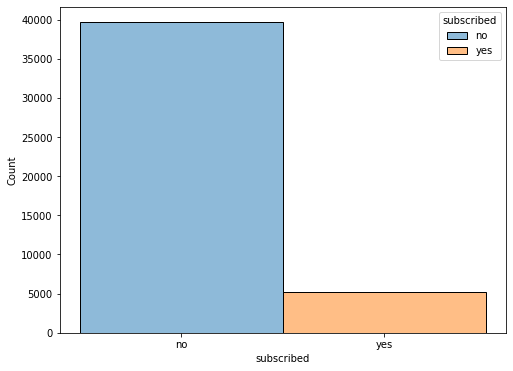

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="subscribed", hue="subscribed")
plt.show()

Observation:
*   Target variable is very imbalanced.
*   Will be addressed before performing modelling using SMOTE technique




## Numerical Features

Text(0.5, 1.0, 'Duration Feature')

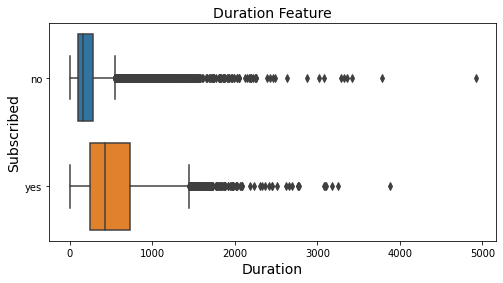

In [ ]:
plt.figure( figsize = (8,4))
sns.boxplot(data = df, x = 'duration', y = 'subscribed')
plt.xlabel("Duration", fontsize = 14)
plt.ylabel("Subscribed", fontsize = 14)
plt.title("Duration Feature", fontsize = 14)

 Observation:
*  We can see that when duration is between 0 and the 2 first minutes most of the people reject the offer. The remaining samples take a decision in a range greater than 2 min up to 12 min. Just a very few take quite a long to both reject or accept the offer.



Text(0.5, 1.0, 'Balance Feature')

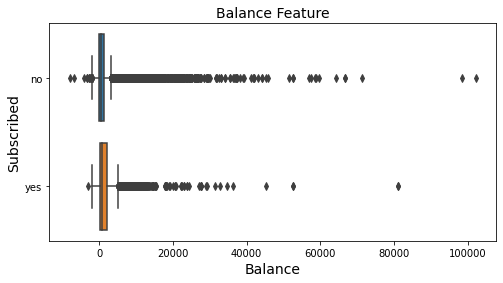

In [ ]:
plt.figure( figsize = (8,4))
sns.boxplot(data = df, x = 'balance', y = 'subscribed')
plt.xlabel("Balance", fontsize = 14)
plt.ylabel("Subscribed", fontsize = 14)
plt.title("Balance Feature", fontsize = 14)

Observation:
*  With 0 as median, it means that majority of the people contacted have zero yearly balance

Text(0.5, 1.0, 'Age Feature')

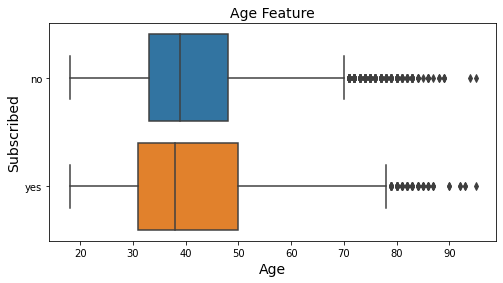

In [ ]:
plt.figure( figsize = (8,4))
sns.boxplot(data = df, x = 'age', y = 'subscribed')
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Subscribed", fontsize = 14)
plt.title("Age Feature", fontsize = 14)

Observation:
*  The most targeted and potentially the most accepting of telemarketing are clients aged between 30 to 50 years old

Text(0.5, 1.0, 'Campaign Feature')

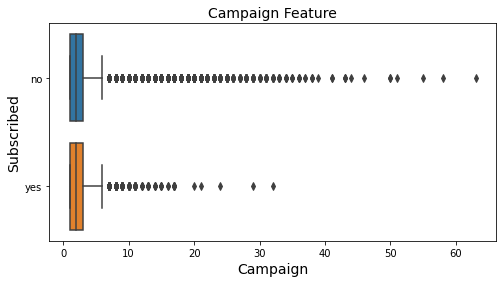

In [ ]:
plt.figure( figsize = (8,4))
sns.boxplot(data = df, x = 'campaign', y = 'subscribed')
plt.xlabel("Campaign", fontsize = 14)
plt.ylabel("Subscribed", fontsize = 14)
plt.title("Campaign Feature", fontsize = 14)

Observation:
*  The outcome of contact frequency between clients who are subscribed and not are almost 50:50
*  Contacting client too frequently are counter-productive

## Client Characteristics

Text(0.5, 1.0, "Client's Education")

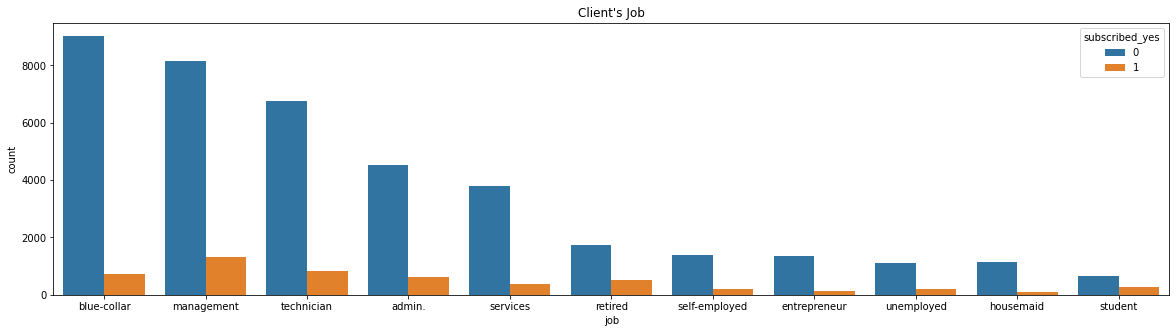

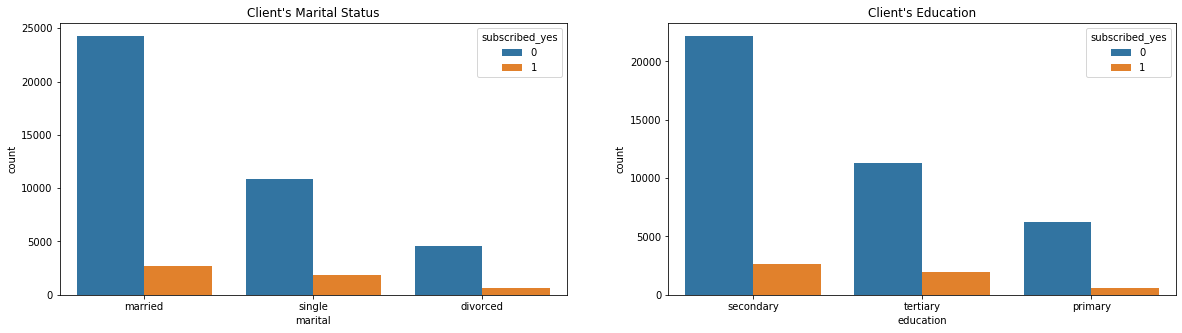

In [ ]:
plt.figure( figsize = (20, 5))
sns.countplot(x = 'job', 
              hue="subscribed_yes",
              data = eda,
              order = eda['job'].value_counts().index)
plt.title('Client\'s Job')

plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.countplot(x = 'marital',
              hue="subscribed_yes",
              data = eda,
              order = eda['marital'].value_counts().index)
plt.title('Client\'s Marital Status')

plt.subplot(122)
sns.countplot(x = 'education',
              hue="subscribed_yes",
              data = eda,
              order = eda['education'].value_counts().index)
plt.title('Client\'s Education')


Observation:
*  Most clients that are contacted and subscribed to term deposits have professional jobs and higher qualification relative to others
*  The bank contacted more married people than single and divorced. Proportional to the sample, more married people means more subscribers
*  More people with higher education degrees were subscribed. Proportional to the sample, more educated people means more subscribers




## Subscription Probability

Text(0.5, 1.0, 'Subscription Probability by Education')

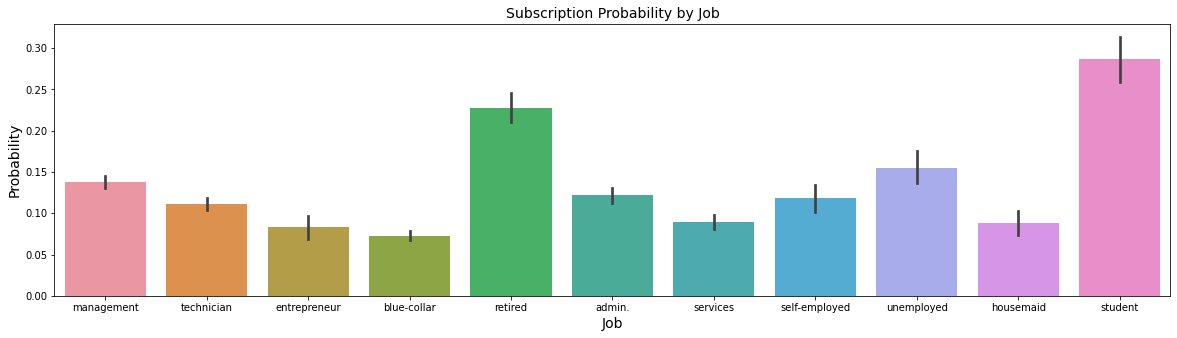

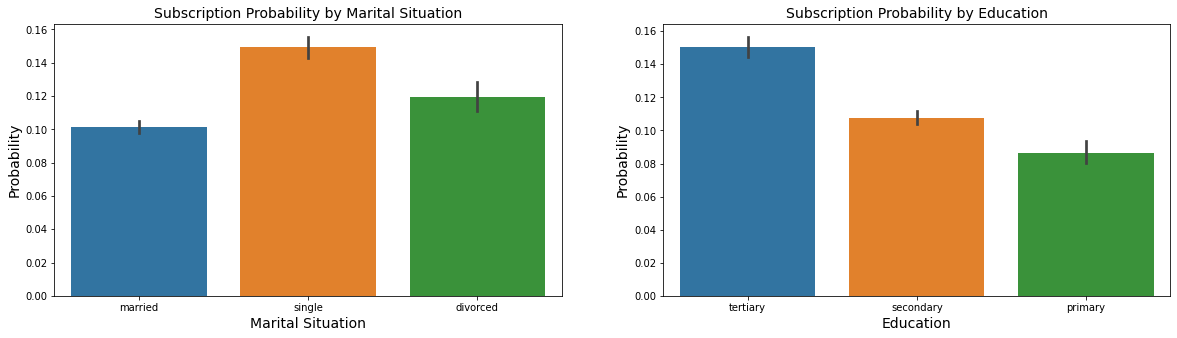

In [ ]:
plt.figure( figsize = (20, 5))
sns.barplot(data = eda, x = 'job', y = 'subscribed_yes')
plt.xlabel("Job", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title("Subscription Probability by Job", fontsize = 14)

plt.figure( figsize = (20, 5))
plt.subplot(121)
sns.barplot(data = eda, x = 'marital', y = 'subscribed_yes')
plt.xlabel("Marital Situation", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title("Subscription Probability by Marital Situation", fontsize = 14)

plt.subplot(122)
sns.barplot(data = eda, x = 'education', y = 'subscribed_yes')
plt.xlabel("Education", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title("Subscription Probability by Education", fontsize = 14)

Observation:
*   Groups of students and retired people, single and people with higher education tend to subscribe the term deposit because of the telemarketing

Text(0.5, 1.0, 'Age Distribution by Job, Divided by Subscription')

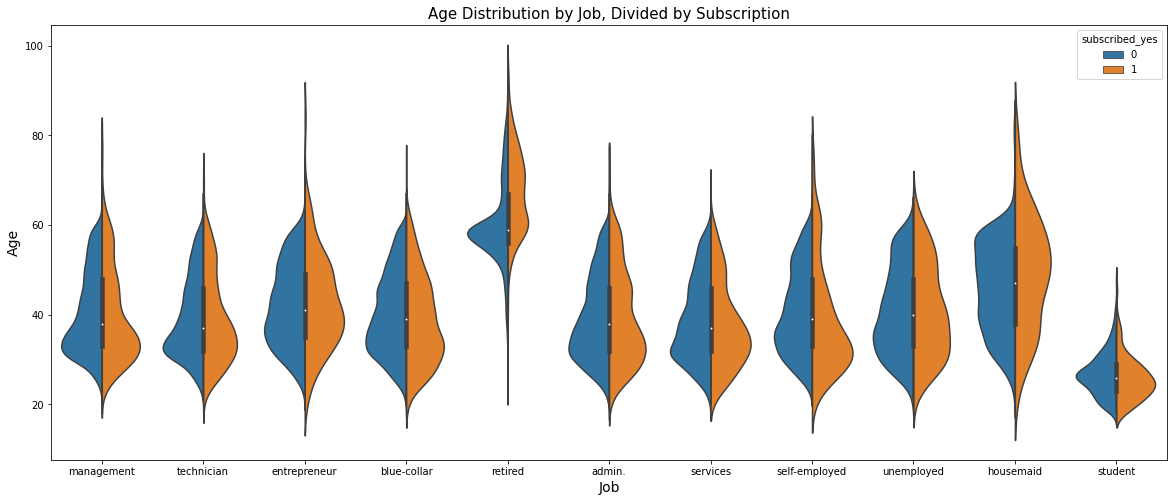

In [ ]:
plt.figure( figsize = (20, 8))
sns.violinplot(x = 'job', y = 'age', hue = 'subscribed_yes', data = eda, split = True)
plt.xlabel("Job", fontsize = 14)
plt.ylabel("Age", fontsize = 14)
plt.title("Age Distribution by Job, Divided by Subscription", fontsize = 15)


Observation:
*   Older people tend to be more susceptible and accepting to telemarketing 

## Multicollinearity Analysis

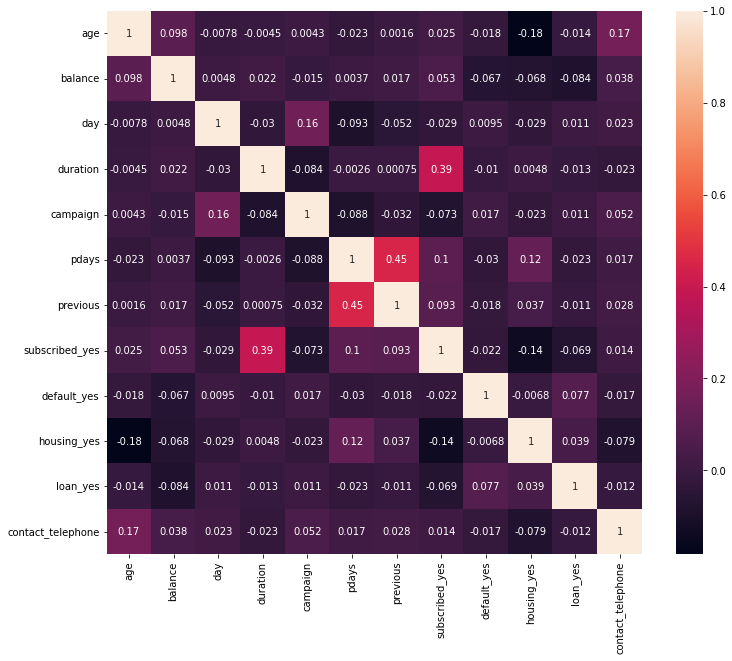

In [ ]:
plt.figure(figsize=(12,10))
correlation_matrix = eda.corr()
Observation:sns.heatmap(correlation_matrix, annot =True)

Observation:
*  No multicolinearity problem for all feature variable
*  The highest positive correlation to target variable is `duration` variable
*  The highest negative correlation to target variable is `housing` variable


# Training models

## Scaling Features

In [ ]:
scaler = StandardScaler()

columns = main.columns[:-1]

target = main['subscribed_yes']
main = main.drop('subscribed_yes',axis = 1)

main = scaler.fit_transform(main)

main = pd.DataFrame(main,columns=[columns])
main.head()

,age,balance,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone
0,1.613167,0.257255,0.010497,-0.569175,-0.525878,-0.185025,-0.168482,1.936423,-0.230374,-0.190865,-0.319204,-0.146032,-0.451144,-0.172834,0.814332,-0.628555,-1.113197,1.545104,-0.135762,0.888524,-0.438325,-0.260755
1,0.292945,-0.436985,-0.416338,-0.569175,-0.525878,-0.185025,-0.168482,-0.516416,-0.230374,-0.190865,-0.319204,-0.146032,2.216586,-0.172834,-1.228000,1.590952,0.898313,-0.647205,-0.135762,0.888524,-0.438325,-0.260755
2,-0.744372,-0.445851,-0.707362,-0.569175,-0.525878,5.404673,-0.168482,-0.516416,-0.230374,-0.190865,-0.319204,-0.146032,-0.451144,-0.172834,0.814332,-0.628555,0.898313,-0.647205,-0.135762,0.888524,2.281411,-0.260755
3,0.575850,0.048064,-0.645277,-0.569175,1.901581,-0.185025,-0.168482,-0.516416,-0.230374,-0.190865,-0.319204,-0.146032,-0.451144,-0.172834,0.814332,-0.628555,0.898313,-0.647205,-0.135762,0.888524,-0.438325,-0.260755
4,-0.555769,-0.370648,-0.462902,-0.569175,-0.525878,-0.185025,-0.168482,1.936423,-0.230374,-0.190865,-0.319204,-0.146032,-0.451144,-0.172834,0.814332,-0.628555,-1.113197,1.545104,-0.135762,0.888524,-0.438325,-0.260755


## Splitting data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(main,target,test_size = 0.20, random_state = 100)

In [ ]:
X_train.columns = X_train.columns.get_level_values(0)
X_test.columns =  X_test.columns.get_level_values(0)

## Handling imbalanced data with SMOTE

In [ ]:
oversample = SMOTE()

X_train_smote, y_train_smote = oversample.fit_resample(X_train,y_train)

In [ ]:
kfold = KFold(shuffle=True , random_state=100)

Function for plotting learning curve

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Modelling and Evaluation

In [ ]:
MLA = [
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),
       LGBMClassifier()
]

name = []
testscore = []
f1 = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train_smote, y_train_smote)
    testscore.append(alg.score(X_train_smote, y_train_smote))
    pred = alg.predict(X_test)
    f1.append(f1_score(y_test, pred))

    
comparison = pd.DataFrame({"name": name, "testscore": testscore, "f1_score": f1})

In [ ]:
comparison = comparison.sort_values(by = "f1_score", ascending = False)
comparison

,name,testscore,f1_score
9,LGBMClassifier,0.918205,0.494138
2,GradientBoostingClassifier,0.871692,0.493894
0,AdaBoostClassifier,0.846302,0.482712
3,RandomForestClassifier,0.999984,0.472574
4,SGDClassifier,0.774146,0.456684
6,KNeighborsClassifier,0.918961,0.423645
1,BaggingClassifier,0.994597,0.416819
5,GaussianNB,0.717521,0.362098
8,ExtraTreeClassifier,0.999984,0.361345
7,DecisionTreeClassifier,0.999984,0.356208


Using F1 Score as our main metric, we can see that Gradient Boosting Classifier and LightGBM Classifier could produce good models

## Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7924
           1       0.39      0.69      0.49      1061

    accuracy                           0.83      8985
   macro avg       0.67      0.77      0.70      8985
weighted avg       0.89      0.83      0.85      8985



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

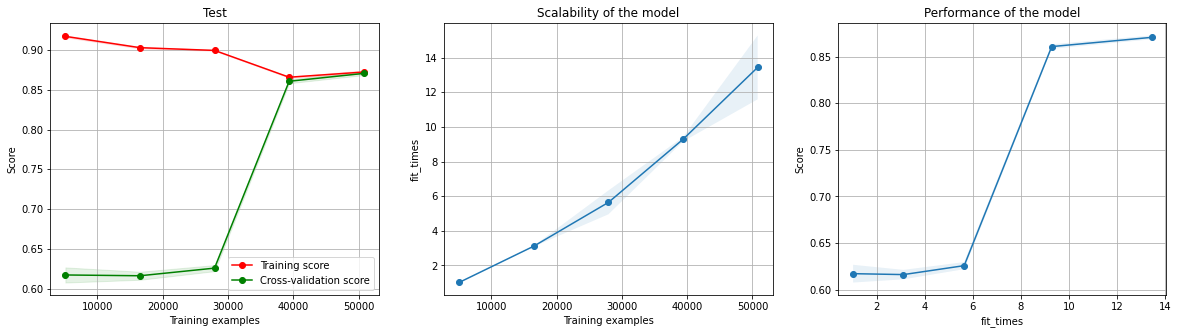

In [ ]:
estimator = ensemble.GradientBoostingClassifier()
estimator.fit(X_train_smote, y_train_smote)
predicted_proba = estimator.predict_proba(X_test)
pred = estimator.predict(X_test)
print(classification_report(y_test, pred))
plot_learning_curve(estimator, "Test",X_train_smote, y_train_smote, cv=kfold, n_jobs=-1)

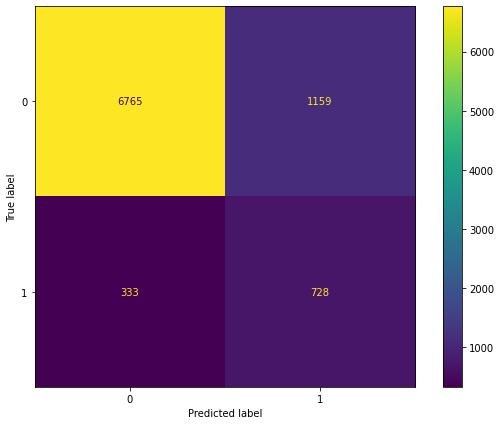

In [ ]:
# Confusion Matrix
fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, pred, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=estimator.classes_)
disp.plot(ax=ax)
plt.show()

Pretty good result on the model using Gradient Boosting Classifier with 0.83 accuracy and 0.49 F1 score, but the performance are a bit on the heavy side

## LightGBM Classifier

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7924
           1       0.46      0.54      0.49      1061

    accuracy                           0.87      8985
   macro avg       0.70      0.73      0.71      8985
weighted avg       0.88      0.87      0.87      8985



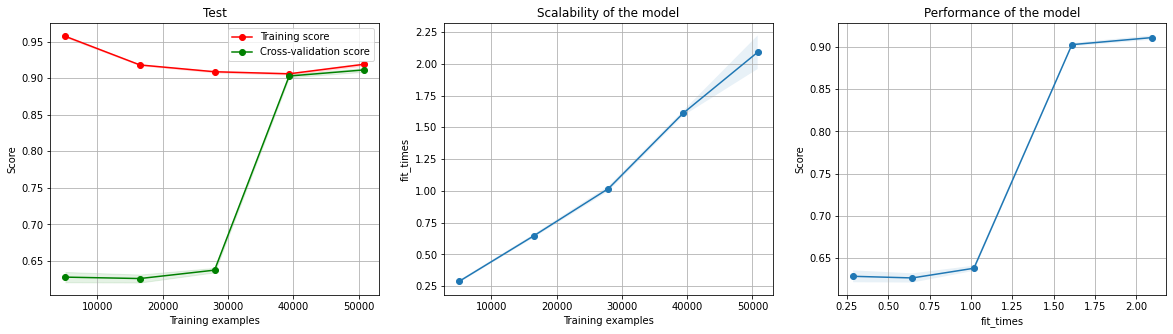

In [ ]:
estimator = LGBMClassifier()
plot_learning_curve(estimator, "Test",X_train_smote, y_train_smote, cv=kfold, n_jobs=-1)
estimator.fit(X_train_smote, y_train_smote)
pred = estimator.predict(X_test)
print(classification_report(y_test, pred))

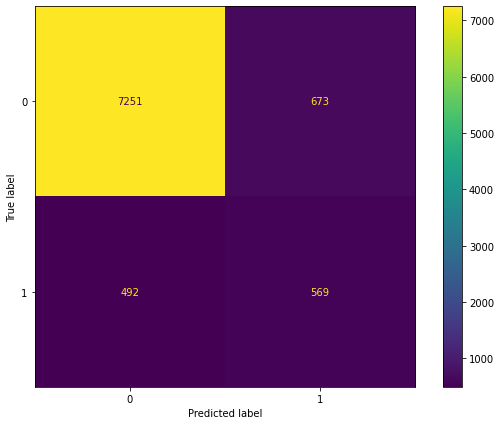

In [ ]:
# Confusion Matrix
fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, pred, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=estimator.classes_)
disp.plot(ax=ax)
plt.show()

Modelling with LightBGM Classifier give us pretty good result, with 0.87 accuracy and 0.49 F1 score.

We can conclude that using LightBGM Classifier is the best choice going forward

## Hyperparameter Tuning

Doing hyperparameter tuning on the LightGBM Classifier

In [ ]:
parameters = {
    'num_leaves': [25, 30, 35],
    'max_depth': range(1,15),
}

#Using F1 as the metric
lgbm_clf_gridcv = GridSearchCV(estimator, parameters, cv=5, scoring='f1')
lgbm_clf_gridcv.fit(X_train_smote, y_train_smote)
lgbm_gridresult = lgbm_clf_gridcv.best_params_
print(f"Best depth: {lgbm_gridresult['max_depth']}")
print(f"Best num_leaves: {lgbm_gridresult['num_leaves']}")
print(f"Best score: {lgbm_clf_gridcv.best_score_}")

Best depth: 7
Best num_leaves: 30
Best score: 0.8854893983333845


In [ ]:
pred = lgbm_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7924
           1       0.44      0.59      0.50      1061

    accuracy                           0.86      8985
   macro avg       0.69      0.74      0.71      8985
weighted avg       0.88      0.86      0.87      8985



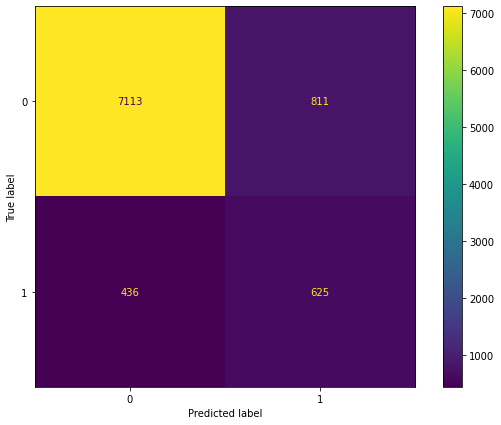

In [ ]:
# Confusion Matrix
fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, pred, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=estimator.classes_)
disp.plot(ax=ax)
plt.show()

Our tuned LightGBM Classifier model got 0.50 F1 score with higher recall, albeit it have a bit less accuracy of 0.86 compared to the default model.

This model perform the best with 



## Feature Importance

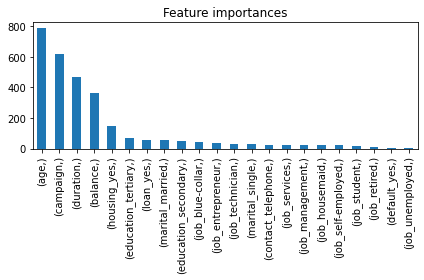

In [ ]:
from sklearn.inspection import permutation_importance

importances = lgbm_clf_gridcv.best_estimator_.feature_importances_

fig, ax = plt.subplots()

lgbm_importances = pd.Series(importances, index=main.columns).sort_values(ascending=False)

lgbm_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()
plt.show()

Observation:
* From our LightGBM Classifier Model feature importances, we know that the client age is the most important characterics to predict whether they will be persuaded by the telemarketing or not
* Campaign frequency and the duration of the call are also important for the effectiveness of telemarketing campaign according to the model

# Conclusion



## Insights

* Roughly one-tenth of the clients that’s contacted by telemarketer actually subscribes to the bank’ term deposit (~11.7% conversion rate).
* Client’s age is the most important factor to predict whether they will be persuaded by the telemarketing or not, with 30-50 years old being the most group willing to subscribe.
* Campaign frequency and the duration of the call are also important for the effectiveness of telemarketing campaign.


## Business Recommendation

*   If the investment is too big for the conversion rate, explore other direct marketing approach.
*   Target potential group that are more willing to buy the product.
*   Make clients engaged when cold calling (e.g.. small talks) so they are more willing to buy the product

